In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import plotly
import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
warnings.filterwarnings('ignore') 

In [2]:
import statsmodels.formula.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [3]:
# Import Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

#import the metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
df = pd.read_csv('merged_v2.csv')
df.head()

,longitude,latitude,Area,Soil group,Land class,Soil type,pH,SOC,Nitrogen,Potassium,Phosphorus,Sulfur,Boron,Zinc,Sand,Silt,Clay
0,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,5.0,1.27,0.08,0.15,19.6,37.7,0.26,0.86,33,33,33
1,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,4.9,1.47,0.09,0.25,4.1,32.0,0.25,0.75,33,33,33
2,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,4.6,1.07,0.05,0.09,13.3,13.5,0.27,0.95,33,33,33
3,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,5.2,1.51,0.06,0.30,20.2,30.0,0.28,1.00,33,33,33
4,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,5.3,1.08,0.11,0.17,20.5,27.8,0.30,1.04,33,33,33


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   longitude   2584 non-null   float64
 1   latitude    2584 non-null   float64
 2   Area        2584 non-null   object 
 3   Soil group  2584 non-null   object 
 4   Land class  2584 non-null   object 
 5   Soil type   2584 non-null   object 
 6   pH          2584 non-null   float64
 7   SOC         2584 non-null   float64
 8   Nitrogen    2584 non-null   float64
 9   Potassium   2584 non-null   float64
 10  Phosphorus  2584 non-null   float64
 11  Sulfur      2584 non-null   float64
 12  Boron       2584 non-null   float64
 13  Zinc        2584 non-null   float64
 14  Sand        2584 non-null   int64  
 15  Silt        2584 non-null   int64  
 16  Clay        2584 non-null   int64  
dtypes: float64(10), int64(3), object(4)
memory usage: 343.3+ KB


In [6]:
df.shape

(2584, 17)

In [7]:
df.select_dtypes(include=['object']).columns

Index(['Area', 'Soil group', 'Land class', 'Soil type'], dtype='object')

In [8]:
df.select_dtypes(include=['float']).columns

Index(['longitude', 'latitude', 'pH', 'SOC', 'Nitrogen', 'Potassium',
       'Phosphorus', 'Sulfur', 'Boron', 'Zinc'],
      dtype='object')

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

longitude     0
latitude      0
Area          0
Soil group    0
Land class    0
Soil type     0
pH            0
SOC           0
Nitrogen      0
Potassium     0
Phosphorus    0
Sulfur        0
Boron         0
Zinc          0
Sand          0
Silt          0
Clay          0
dtype: int64

In [10]:
# Check for duplicates
duplicates = df.duplicated()
print(duplicates.sum())

0


In [11]:
# Value counts for each categorical feature: 

for column in df.select_dtypes(include=['object']):
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print(df[column].nunique())
    print()
    print("="*45)

Value counts for Area:
Area
isda              2107
Mithpukur          186
Pirgacha           125
Taraganj Thana      79
Kaunia upazila      65
Gangachara          22
Name: count, dtype: int64
6

Value counts for Soil group:
Soil group
isda                       2107
Gangachara                  206
Kaunia                       55
Palashbari                   37
Berries                      31
Alluvial soil of Teesta      22
the moon                     18
belab                        17
Sahapur                      16
Noadda                       14
Pirgacha                     13
Imadpur                      11
Teesta sandy soil             6
Kachna                        5
Saghata                       5
recession                     5
Bhimpur                       5
Khilgaon                      4
Chilmari                      2
Menanagar                     2
the pen                       1
The militants                 1
Indrail                       1
Name: count, dtype: int64
23


In [12]:
# Replace categories with counts <= 10 as 'Other' in 'Soil group'
threshold = 10
soil_group_counts = df['Soil group'].value_counts()

# Create a new column with grouped categories
df['Soil group'] = df['Soil group'].apply(lambda x: x if soil_group_counts[x] > threshold else 'Other')

# Verify the updated value counts
print(df['Soil group'].value_counts())
print(df['Soil group'].nunique())

Soil group
isda                       2107
Gangachara                  206
Kaunia                       55
Other                        37
Palashbari                   37
Berries                      31
Alluvial soil of Teesta      22
the moon                     18
belab                        17
Sahapur                      16
Noadda                       14
Pirgacha                     13
Imadpur                      11
Name: count, dtype: int64
13


**Skewness and Outlier Detection**

In [13]:
# Detecting outliers using IQR (Interquartile Range)
numeric_data = df.select_dtypes(include=['number'])

# Calculate the first and third quartile
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Detect outliers
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()

print(outliers)

longitude     477
latitude      477
pH             23
SOC            99
Nitrogen       45
Potassium      64
Phosphorus    213
Sulfur        171
Boron         166
Zinc           49
Sand            6
Silt          286
Clay          193
dtype: int64


In [14]:
# Calculate skewness for all numerical columns
skewness = df.select_dtypes(include=['number']).skew()

# Display the skewness values
print(skewness)

longitude     1.616018
latitude      1.561540
pH           -0.247267
SOC           1.505721
Nitrogen      1.009825
Potassium     0.985205
Phosphorus    3.351142
Sulfur        2.310504
Boron         2.104562
Zinc          1.099748
Sand         -0.699432
Silt          1.301490
Clay          1.521748
dtype: float64


In [15]:
# Get rid of outliers using capping for 'longitude',"latitude", "SOC" , "Phosphorus" ,"Sulfur" ,"Boron", "Clay"

x_variables = ['longitude',"latitude", "SOC" , "Phosphorus" ,"Sulfur" ,"Boron", "Clay"]

for feature in x_variables:
    # Define lower and upper bounds (e.g., based on percentiles)
    lower_bound = df[feature].quantile(0.05)  # Set to the 5th percentile
    upper_bound = df[feature].quantile(0.95)  # Set to the 95th percentile

    # Apply capping
    df[feature] = np.where(df[feature] >= upper_bound, upper_bound, 
                  np.where(df[feature] <= lower_bound, lower_bound, df[feature]))

In [16]:
skewness = df["longitude"].skew()
print(f"longitude Phosphorus Skewness: {skewness}")
print("="*45)
skewness = df["latitude"].skew()
print(f"latitude Phosphorus Skewness: {skewness}")
print("="*45)
skewness = df["SOC"].skew()
print(f"SOC Phosphorus Skewness: {skewness}")
print("="*45)
skewness = df["Phosphorus"].skew()
print(f"Phosphorus Skewness: {skewness}")
print("="*45)
skewness = df["Sulfur"].skew()
print(f"Sulfur Skewness: {skewness}")
print("="*45)
skewness = df["Boron"].skew()
print(f"Boron Skewness: {skewness}")
print("="*45)
skewness = df["Clay"].skew()
print(f"Clay Phosphorus Skewness: {skewness}")

longitude Phosphorus Skewness: 1.6163559832173489
latitude Phosphorus Skewness: 1.5639271436116822
SOC Phosphorus Skewness: 0.9668716651823516
Phosphorus Skewness: 1.708239395201004
Sulfur Skewness: 1.256775467962141
Boron Skewness: 1.2343011908172137
Clay Phosphorus Skewness: 0.9100012586590758


**Summary Statistics**

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,2584.0,22.992581,31.588796,4.857948,6.972760,8.617840,10.430405,89.400000
latitude,2584.0,12.718120,6.201982,8.424444,9.251048,9.971485,11.159215,25.770000
pH,2584.0,5.869107,0.518722,4.100000,5.536365,5.913315,6.226348,7.945400
SOC,2584.0,0.981308,0.551118,0.343992,0.553925,0.807029,1.290080,2.280000
Nitrogen,2584.0,0.070375,0.039282,0.000800,0.040000,0.062176,0.092213,0.257264
Potassium,2584.0,0.238226,0.140441,0.000000,0.138462,0.209134,0.313721,0.990000
Phosphorus,2584.0,7.846447,6.235189,2.071193,3.664697,5.714590,9.579792,26.494000
Sulfur,2584.0,8.555132,4.068960,3.965484,5.668802,7.243420,10.298875,19.300000
Boron,2584.0,0.107296,0.110830,0.006680,0.024444,0.060213,0.154269,0.380000
Zinc,2584.0,1.187543,0.470586,0.080000,0.879671,1.143550,1.443010,4.000000


**Insight into 'SOC'** 

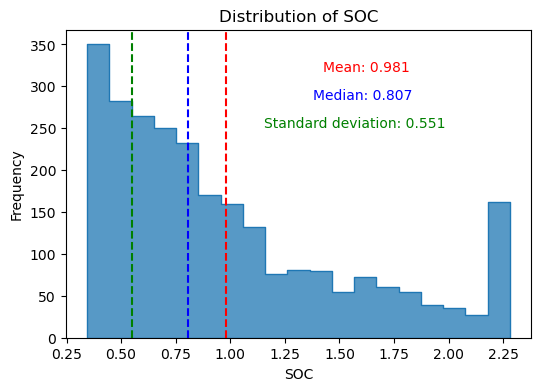

In [18]:
# Histogram:

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='SOC', element='step', common_norm=False)


mean = np.mean(df['SOC'])
median = np.median(df['SOC'])
std_deviation = np.std(df['SOC'])

plt.axvline(mean, color='red', linestyle='--')
plt.axvline(median, color='blue', linestyle='--')
plt.axvline(x=std_deviation, color='green', linestyle='--')

# annotate mean,median & Standard deviation
plt.annotate(f'Mean: {mean:.3}', xy=(mean, plt.gca().get_ylim()[1]), xytext=(70, -30),
             textcoords='offset points', color='red', fontsize=10)
plt.annotate(f'Median: {median:.3f}', xy=(median, plt.gca().get_ylim()[1]), xytext=(90, -50),
             textcoords='offset points', color='blue', fontsize=10)
plt.annotate(f'Standard deviation: {std_deviation:.3f}', xy=(std_deviation, plt.gca().get_ylim()[1]), xytext=(95, -70),
           textcoords='offset points', color='green', fontsize=10)
plt.xlabel('SOC')
plt.ylabel('Frequency')
plt.title('Distribution of SOC')
plt.show()

In [19]:
df["SOC"].describe()

count    2584.000000
mean        0.981308
std         0.551118
min         0.343992
25%         0.553925
50%         0.807029
75%         1.290080
max         2.280000
Name: SOC, dtype: float64

In [20]:
skewness = df["SOC"].skew()
print(f"Skewness: {skewness}")

Skewness: 0.9668716651823516


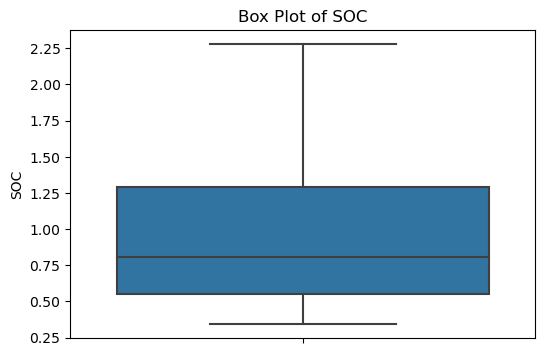

In [21]:
# Create a box plot 
plt.figure(figsize=(6, 4))
sns.boxplot(y='SOC', data=df)
plt.ylabel('SOC')
plt.title('Box Plot of SOC')
plt.show()

**Logarithmic Transformation - SOC**

In [22]:
# Logarithmic Transformation
df['SOC'] = np.log1p(df['SOC'])

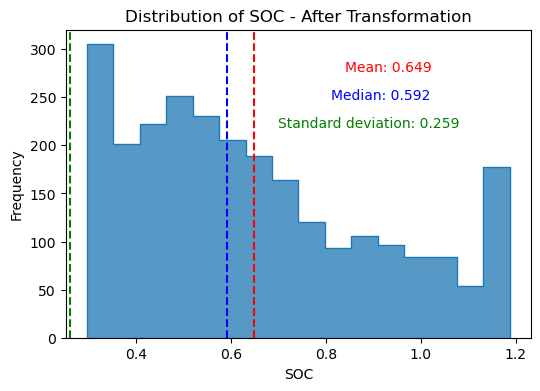

In [23]:
# Histogram:

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='SOC', element='step', common_norm=False)


mean = np.mean(df['SOC'])
median = np.median(df['SOC'])
std_deviation = np.std(df['SOC'])

plt.axvline(mean, color='red', linestyle='--')
plt.axvline(median, color='blue', linestyle='--')
plt.axvline(x=std_deviation, color='green', linestyle='--')

# annotate mean,median & Standard deviation
plt.annotate(f'Mean: {mean:.3}', xy=(mean, plt.gca().get_ylim()[1]), xytext=(65, -30),
             textcoords='offset points', color='red', fontsize=10)
plt.annotate(f'Median: {median:.3f}', xy=(median, plt.gca().get_ylim()[1]), xytext=(75, -50),
             textcoords='offset points', color='blue', fontsize=10)
plt.annotate(f'Standard deviation: {std_deviation:.3f}', xy=(std_deviation, plt.gca().get_ylim()[1]), xytext=(150, -70),
           textcoords='offset points', color='green', fontsize=10)
plt.xlabel('SOC')
plt.ylabel('Frequency')
plt.title('Distribution of SOC - After Transformation')
plt.show()

In [24]:
df["SOC"].describe()

count    2584.000000
mean        0.648751
std         0.258755
min         0.295644
25%         0.440784
50%         0.591684
75%         0.828587
max         1.187843
Name: SOC, dtype: float64

In [25]:
skewness = df["SOC"].skew()
print(f"Skewness: {skewness}")

Skewness: 0.5886491516309057


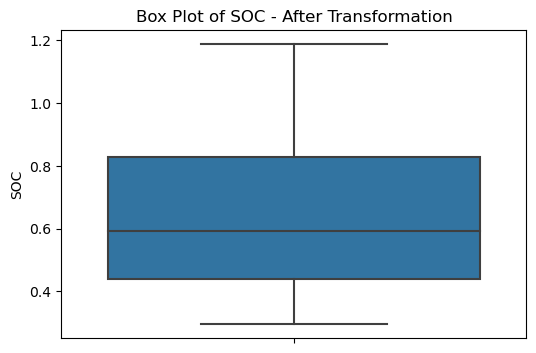

In [26]:
# Create a box plot 
plt.figure(figsize=(6, 4))
sns.boxplot(y='SOC', data=df)
plt.ylabel('SOC')
plt.title('Box Plot of SOC - After Transformation')
plt.show()

# Modeling - Target: "SOC" - All Features

In [27]:
df.columns

Index(['longitude', 'latitude', 'Area', 'Soil group', 'Land class',
       'Soil type', 'pH', 'SOC', 'Nitrogen', 'Potassium', 'Phosphorus',
       'Sulfur', 'Boron', 'Zinc', 'Sand', 'Silt', 'Clay'],
      dtype='object')

In [28]:
df.select_dtypes(include=['object']).columns

Index(['Area', 'Soil group', 'Land class', 'Soil type'], dtype='object')

In [29]:
df.select_dtypes(include=['float']).columns

Index(['longitude', 'latitude', 'pH', 'SOC', 'Nitrogen', 'Potassium',
       'Phosphorus', 'Sulfur', 'Boron', 'Zinc', 'Clay'],
      dtype='object')

In [30]:
num_var = ['longitude', 'latitude',  'pH',  'Nitrogen', 'Potassium', 'Phosphorus',
        'Sulfur', 'Boron', 'Zinc', 'Sand', 'Silt', 'Clay']

cat_var = ['Area', 'Soil group', 'Land class', 'Soil type']

y = df['SOC']

X = df[cat_var + num_var]
y = pd.DataFrame(y, columns=['SOC'])

In [31]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        2584 non-null   object 
 1   Soil group  2584 non-null   object 
 2   Land class  2584 non-null   object 
 3   Soil type   2584 non-null   object 
 4   longitude   2584 non-null   float64
 5   latitude    2584 non-null   float64
 6   pH          2584 non-null   float64
 7   Nitrogen    2584 non-null   float64
 8   Potassium   2584 non-null   float64
 9   Phosphorus  2584 non-null   float64
 10  Sulfur      2584 non-null   float64
 11  Boron       2584 non-null   float64
 12  Zinc        2584 non-null   float64
 13  Sand        2584 non-null   int64  
 14  Silt        2584 non-null   int64  
 15  Clay        2584 non-null   float64
dtypes: float64(10), int64(2), object(4)
memory usage: 323.1+ KB


In [33]:
# Train-test split:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 , shuffle=True)

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (1808, 16)
X_test.shape: (776, 16)
y_train.shape: (1808, 1)
y_test.shape: (776, 1)


In [34]:
# Preprocessing with pipelines

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


pipeline_categorical = Pipeline([('onehot', OneHotEncoder(handle_unknown="ignore")),])

pipeline_numerical = Pipeline([('scaler', MinMaxScaler(feature_range=(0,1))),])

pipeline_full = ColumnTransformer([("categorical", pipeline_categorical, cat_var),
                                   ("numerical", pipeline_numerical, num_var)])

In [35]:
# Apply the pipeline

pipeline_full.fit(X_train)

X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)

print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")
print()
print('X_train_transformed:', type(X_train_transformed))
print('X_test_transformed:', type(X_test_transformed))

X_train_transformed.shape: (1808, 44)
X_test_transformed.shape: (776, 44)

X_train_transformed: <class 'numpy.ndarray'>
X_test_transformed: <class 'numpy.ndarray'>


In [36]:
models = {
    'LinearRegression': LinearRegression(),
    'LassoRegressor': Lasso(max_iter=10000, random_state=42),
    'RidgeRegressor': Ridge(max_iter=10000, random_state=42),
    "ElasticNet": ElasticNet(alpha=0.02, random_state=42),
    # "KNN": KNeighborsRegressor(),
    'DTR': DecisionTreeRegressor(random_state=42),
    'SVR': SVR(),
    'RFR': RandomForestRegressor(random_state=42),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=5, random_state=42),
    'ADABoost': AdaBoostRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),
    'LightGBM': lgb.LGBMRegressor(random_state=42)
}

In [37]:
# Train multiple models

model_list=[]
r2_list=[]
mae_list=[]
mse_list=[]
rmse_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_transformed,y_train)

    #Make Predictions
    y_pred=model.predict(X_test_transformed)

    # Evaluation Metric:
    #r2 = model.score(X_test_transformed, y_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(mean_squared_error(y_test, y_pred))

    model_list.append(list(models.keys())[i])
    r2_list.append(r2)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)

    # Print the performance metrics for each model
    print(f"Model: {list(models.keys())[i]}")
    print(f"R2 Score: {r2}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print("="*30)

Model: LinearRegression
R2 Score: 0.8194440399458609
MAE: 0.08074135171270339
MSE: 0.012116040905164561
RMSE: 0.11007288905613662
Model: LassoRegressor
R2 Score: -4.959841285900879e-06
MAE: 0.21502230879834203
MSE: 0.06710440904399664
RMSE: 0.2590451872627566
Model: RidgeRegressor
R2 Score: 0.8300797109706404
MAE: 0.08019871920899999
MSE: 0.011402344026083625
RMSE: 0.10678175886397276
Model: ElasticNet
R2 Score: 0.7126790064630238
MAE: 0.11164977149434609
MSE: 0.01928040984945998
RMSE: 0.13885391549920362
Model: DTR
R2 Score: 0.7352702488029079
MAE: 0.0987608850920212
MSE: 0.017764445401615404
RMSE: 0.1332833275455539
Model: SVR
R2 Score: 0.8342461400331886
MAE: 0.07866431375384662
MSE: 0.011122759652711709
RMSE: 0.10546449474923639
Model: RFR
R2 Score: 0.8572683803176249
MAE: 0.07188497952920983
MSE: 0.009577873485945914
RMSE: 0.09786661067977125
Model: ExtraTrees
R2 Score: 0.8294068796210069
MAE: 0.07865269016044017
MSE: 0.011447493752251578
RMSE: 0.10699296122760403
Model: ADABoost


In [38]:
# Find the index of the model with the best r2 score
best_index_r2 = r2_list.index(max(r2_list))

# Find the index of the model with the best mae score
best_index_mae = mae_list.index(min(mae_list))

# Find the index of the model with the best mse score
best_index_mse = mse_list.index(min(mse_list))

# Find the index of the model with the best rmse score
best_index_rmse = rmse_list.index(min(rmse_list))

# Determine the model with the best performance based on the chosen metric
best_r2_model = model_list[best_index_r2]
best_mae_model = model_list[best_index_mae]
best_mse_model = model_list[best_index_mse]
best_rmse_model = model_list[best_index_rmse]

# Print the best models and their corresponding metric
print("The model with the best R2 score is:", best_r2_model)
print("R2 score:", r2_list[best_index_r2])
print("="*40)
print("The model with the best MAE score is:", best_mae_model)
print("MAE:", mae_list[best_index_mae])
print("="*40)
print("The model with the best MSE score is:", best_mse_model)
print("MSE:", mse_list[best_index_mse])
print("="*40)
print("The model with the best RMSE score is:", best_rmse_model)
print("RMSE:", rmse_list[best_index_rmse])

The model with the best R2 score is: CatBoost
R2 score: 0.8657348962429341
The model with the best MAE score is: CatBoost
MAE: 0.06945382779805745
The model with the best MSE score is: CatBoost
MSE: 0.00900973575598942
The model with the best RMSE score is: CatBoost
RMSE: 0.09491962787532103


In [39]:
# Create a DF for Result:

results_df = pd.DataFrame({
    'Model': model_list,
    'R2 Score': r2_list,
    'MAE': mae_list,
    'MSE': mse_list,
    'RMSE': rmse_list})

results_df.sort_values(by="RMSE", ascending=True)

,Model,R2 Score,MAE,MSE,RMSE
10,CatBoost,0.865735,0.069454,0.009010,0.094920
11,LightGBM,0.860668,0.071169,0.009350,0.096694
6,RFR,0.857268,0.071885,0.009578,0.097867
9,XGBoost,0.840049,0.074934,0.010733,0.103602
5,SVR,0.834246,0.078664,0.011123,0.105464
2,RidgeRegressor,0.830080,0.080199,0.011402,0.106782
7,ExtraTrees,0.829407,0.078653,0.011447,0.106993
0,LinearRegression,0.819444,0.080741,0.012116,0.110073
8,ADABoost,0.800611,0.092829,0.013380,0.115671
4,DTR,0.735270,0.098761,0.017764,0.133283


**First Top Model: CatBoost Regressor**

In [40]:
CatBoost = CatBoostRegressor(random_state=42, verbose=0)
CatBoost.fit(X_train_transformed, y_train)

In [41]:
y_pred =CatBoost.predict(X_test_transformed)

In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2 Score: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R2 Score: 0.8657348962429341
MAE: 0.06945382779805745
MSE: 0.00900973575598942
RMSE: 0.09491962787532103


**Hyperparameter Search for CatBoost Regression:**

In [43]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for CatBoost
param_grid = {
    'depth': [4, 6, 8, 10, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'iterations': [200, 500],
    'l2_leaf_reg': [1, 3, 5, 7, 10],
}

# Initialize CatBoostRegressor with early stopping
catboost_model = CatBoostRegressor(
    verbose=0,          # Suppress output
    early_stopping_rounds=50,  # Stop training early if no improvement
    cat_features=None   # Specify categorical features if needed
)

# Use RandomizedSearchCV for faster hyperparameter search
random_search = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,                
    n_iter=10,           
    n_jobs=-1,           
    verbose=1,
    random_state=42      
)

# Fit the model
random_search.fit(X_train_transformed, y_train)

# Print best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 500, 'depth': 6}
Best Score: -0.008288910568564749


In [44]:
print(random_search.best_params_)
print("\n",random_search.best_score_)

{'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 500, 'depth': 6}

 -0.008288910568564749


In [45]:
# Initialize CatBoostRegressor with the best parameters
Tuned_catboost = CatBoostRegressor(
    learning_rate=0.05,
    l2_leaf_reg=5,
    iterations=500,
    depth=6,
    verbose=0,  # Suppress training output
    early_stopping_rounds=50)  

In [46]:
Tuned_catboost.fit(X_train_transformed, y_train)
y_pred=Tuned_catboost.predict(X_test_transformed)

In [47]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2 Score: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R2 Score: 0.8671572706417248
MAE: 0.06920774333450101
MSE: 0.008914288635921832
RMSE: 0.09441551056855982


 * Hyperparameter tuning did not lead to any improvement in the model's performance. 

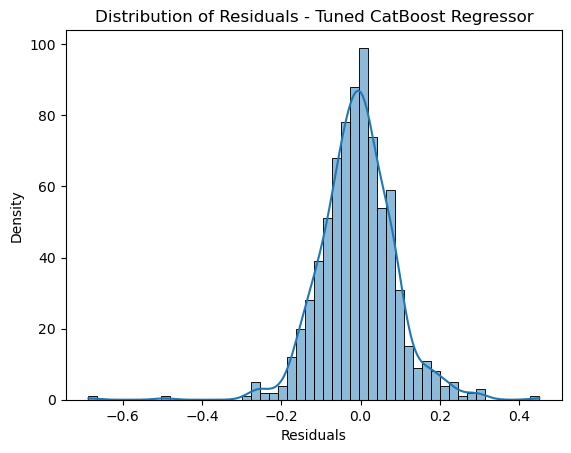

In [48]:
# Calculate residuals
residuals = y_test.values.flatten() - y_pred.flatten()

# Visualize residuals
#sns.kdeplot(residuals)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals - Tuned CatBoost Regressor')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

- The residual plot for the tuned CatBoost Regressor shows a symmetric distribution centered around zero, closely resembling a normal distribution, indicating no significant bias in predictions. 
- The residuals have low variance, suggesting a good fit, though a few outliers on the extremes are observed.

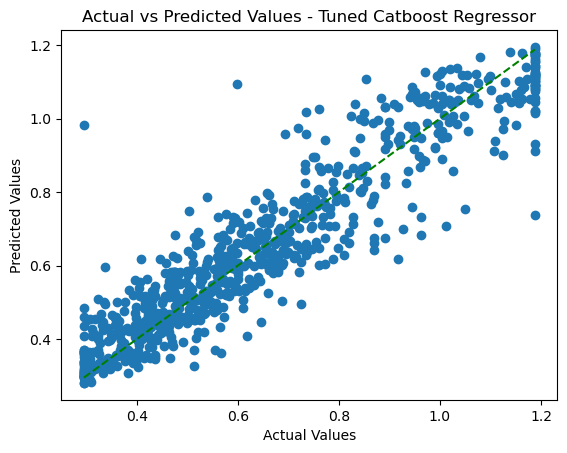

In [49]:
# Line Plot: Actual vs Predicted Values

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='green', label='Actual')
plt.scatter(y_test, y_pred, label='Tuned Catboost Regressor Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Tuned Catboost Regressor')
plt.show()

* The scatter plot of actual versus predicted values for the tuned CatBoost Regressor shows a strong linear relationship, with most points closely aligning along the diagonal line, indicating accurate predictions. However, some deviations and dispersion from the line suggest room for improvement in model calibration or handling specific data points.

**Ploting the learning curve**

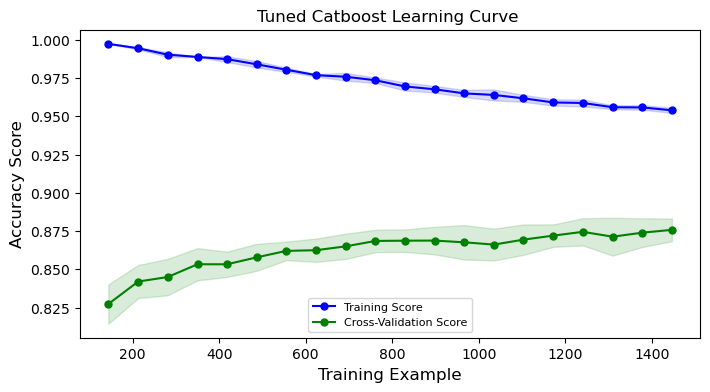

In [50]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=Tuned_catboost, 
                                                       X=X_train_transformed, y=y_train,
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 20), n_jobs=-1)

plt.figure(figsize=(8,4))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Tuned Catboost Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='lower center', fontsize=8)
plt.show()

**Training Score (Blue Line):**

- Starts near 1.0, indicating near-perfect fit on the training set.
Gradually decreases as the number of training examples increases, reflecting the model's ability to generalize while still maintaining high accuracy.

**Cross-Validation Curve (Green Line):**

- Starts lower, around 0.825, indicating initial underperformance on unseen data.
- Gradually improves as the number of training examples increases, reaching around 0.875, suggesting better generalization with more data.

**Gap Between Curves:**

- The gap between the training and validation curves indicates some degree of overfitting, but the narrowing trend shows promise for improved performance with further data augmentation or model tuning.

**Feature Importances Analysis**

In [51]:
# Get feature importances
feature_importances = Tuned_catboost.feature_importances_

# Get one-hot encoded feature names
onehot_columns = list(pipeline_full.named_transformers_['categorical']['onehot'].get_feature_names_out(cat_var))

# Create a Series with feature importances and sort it
feat_importances = pd.Series(feature_importances, index=onehot_columns + num_var)
feat_importances_sorted = feat_importances.sort_values(ascending=False)

# Select the important features
Top_20_Important_Features = feat_importances_sorted[:20]

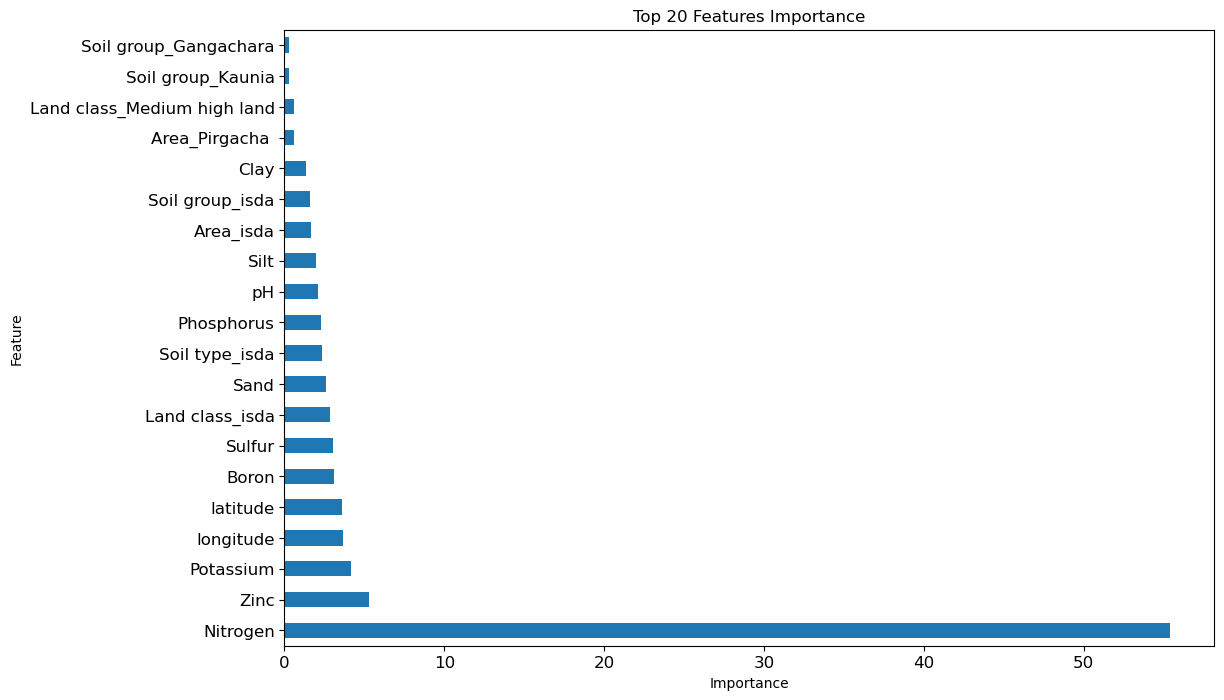

In [52]:
# Plot graph of sorted feature importances:

plt.figure(figsize=(12, 8))
Top_20_Important_Features.plot(kind='barh', fontsize=12)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features Importance')
plt.show()

In [53]:
print(Top_20_Important_Features)

Nitrogen                       55.406320
Zinc                            5.304919
Potassium                       4.184938
longitude                       3.681812
latitude                        3.607423
Boron                           3.082182
Sulfur                          3.070933
Land class_isda                 2.859518
Sand                            2.597466
Soil type_isda                  2.372829
Phosphorus                      2.311839
pH                              2.127001
Silt                            1.966045
Area_isda                       1.659368
Soil group_isda                 1.616954
Clay                            1.358050
Area_Pirgacha                   0.573416
Land class_Medium high land     0.569212
Soil group_Kaunia               0.290516
Soil group_Gangachara           0.277877
dtype: float64


**SHAP Values Analysis:**

In [54]:
import shap

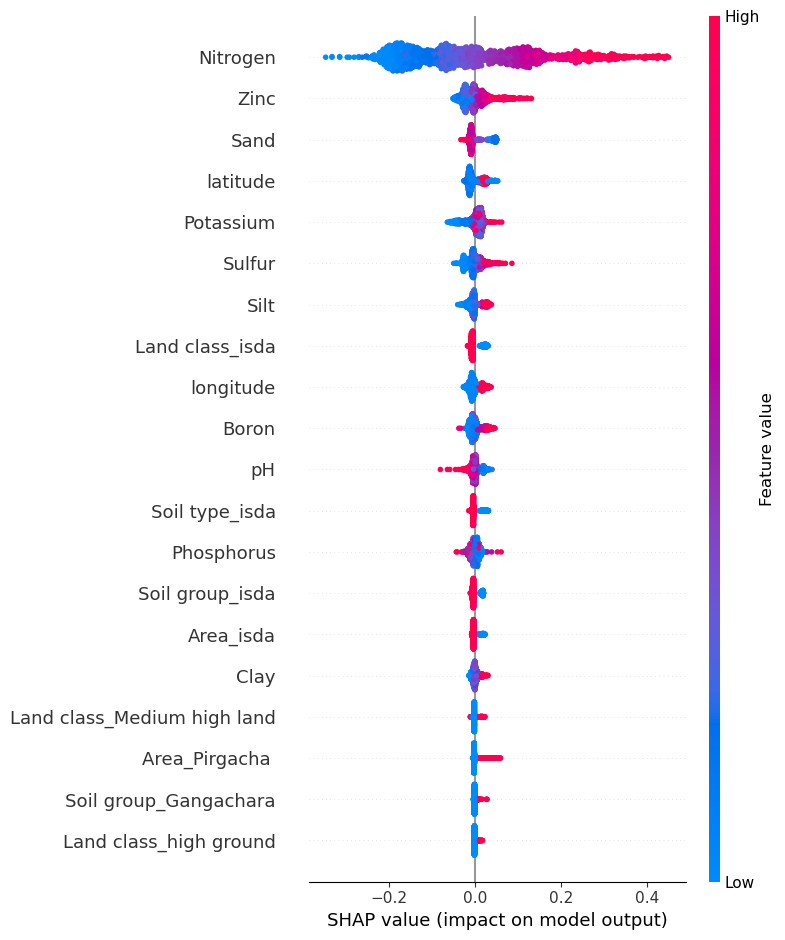

In [55]:
# Step 1: Extract Feature Names
# Get numerical feature names directly
num_features = num_var

# Get categorical feature names from the OneHotEncoder
cat_features = pipeline_full.named_transformers_['categorical'] \
                            .named_steps['onehot'] \
                            .get_feature_names_out(cat_var)

# Combine all feature names
all_features = np.concatenate([cat_features, num_features])

# Step 2: Convert Transformed Data to DataFrame
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=all_features)

# Step 3: Use SHAP with CatBoost
# CatBoost has its own explainer - use TreeExplainer for SHAP
explainer = shap.TreeExplainer(Tuned_catboost)

# Compute SHAP values
shap_values = explainer.shap_values(X_train_transformed_df)

# Step 4: SHAP Summary Plot
shap.summary_plot(shap_values, X_train_transformed_df)

In [56]:
# Step 1: Combine feature names for transformed data
all_features = np.concatenate([
    pipeline_full.named_transformers_['categorical'] \
                 .named_steps['onehot'].get_feature_names_out(cat_var), 
    num_var])

# Step 2: Create a DataFrame for SHAP values
shap_values_df = pd.DataFrame(shap_values, columns=all_features)

# Step 3: Calculate mean absolute SHAP values for feature importance
mean_abs_shap_values = shap_values_df.abs().mean().sort_values(ascending=False)

# Step 4: Create a DataFrame to display SHAP feature importance
shap_values_table = pd.DataFrame({
    'Feature': mean_abs_shap_values.index,
    'Mean SHAP Value': mean_abs_shap_values.values})

# Display the SHAP values
shap_values_table


,Feature,Mean SHAP Value
0,Nitrogen,0.130904
1,Zinc,0.020737
2,Sand,0.015355
3,latitude,0.014363
4,Potassium,0.013624
5,Sulfur,0.012582
6,Silt,0.010341
7,Land class_isda,0.009622
8,longitude,0.009419
9,Boron,0.009360


**Permutation Importance Analysis**

In [57]:
from sklearn.inspection import permutation_importance

# Perform Permutation Importance on the test set
result = permutation_importance(
    Tuned_catboost,                # Trained CatBoost model
    X_test_transformed,            # Transformed test features
    y_test,                        # True test target values
    scoring='neg_mean_squared_error',  # Evaluation metric
    n_repeats=30,                  # Number of permutations
    random_state=42,               # For reproducibility
    n_jobs=-1)                      # Use all available CPU cores

# Convert results to a DataFrame 
perm_importance_df = pd.DataFrame({
    'Feature': pipeline_full.get_feature_names_out(),   # Feature names after pipeline
    'Importance': result.importances_mean,             # Mean permutation importance
    'Std': result.importances_std})                      # Standard deviation


# Sort by importance values 
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

In [58]:
# Display the permutation importance:

print("Permutation Importance Results:")
perm_importance_df

Permutation Importance Results:


,Feature,Importance,Std
35,numerical__Nitrogen,5.676185e-02,1.988258e-03
40,numerical__Zinc,1.487050e-03,1.949834e-04
33,numerical__latitude,1.072694e-03,1.478134e-04
32,numerical__longitude,7.024602e-04,1.024283e-04
36,numerical__Potassium,5.698236e-04,1.552699e-04
41,numerical__Sand,5.281036e-04,9.661153e-05
24,categorical__Land class_isda,3.883137e-04,8.017736e-05
39,numerical__Boron,3.243601e-04,1.263499e-04
42,numerical__Silt,2.865537e-04,1.165015e-04
28,categorical__Soil type_isda,1.651537e-04,7.212592e-05


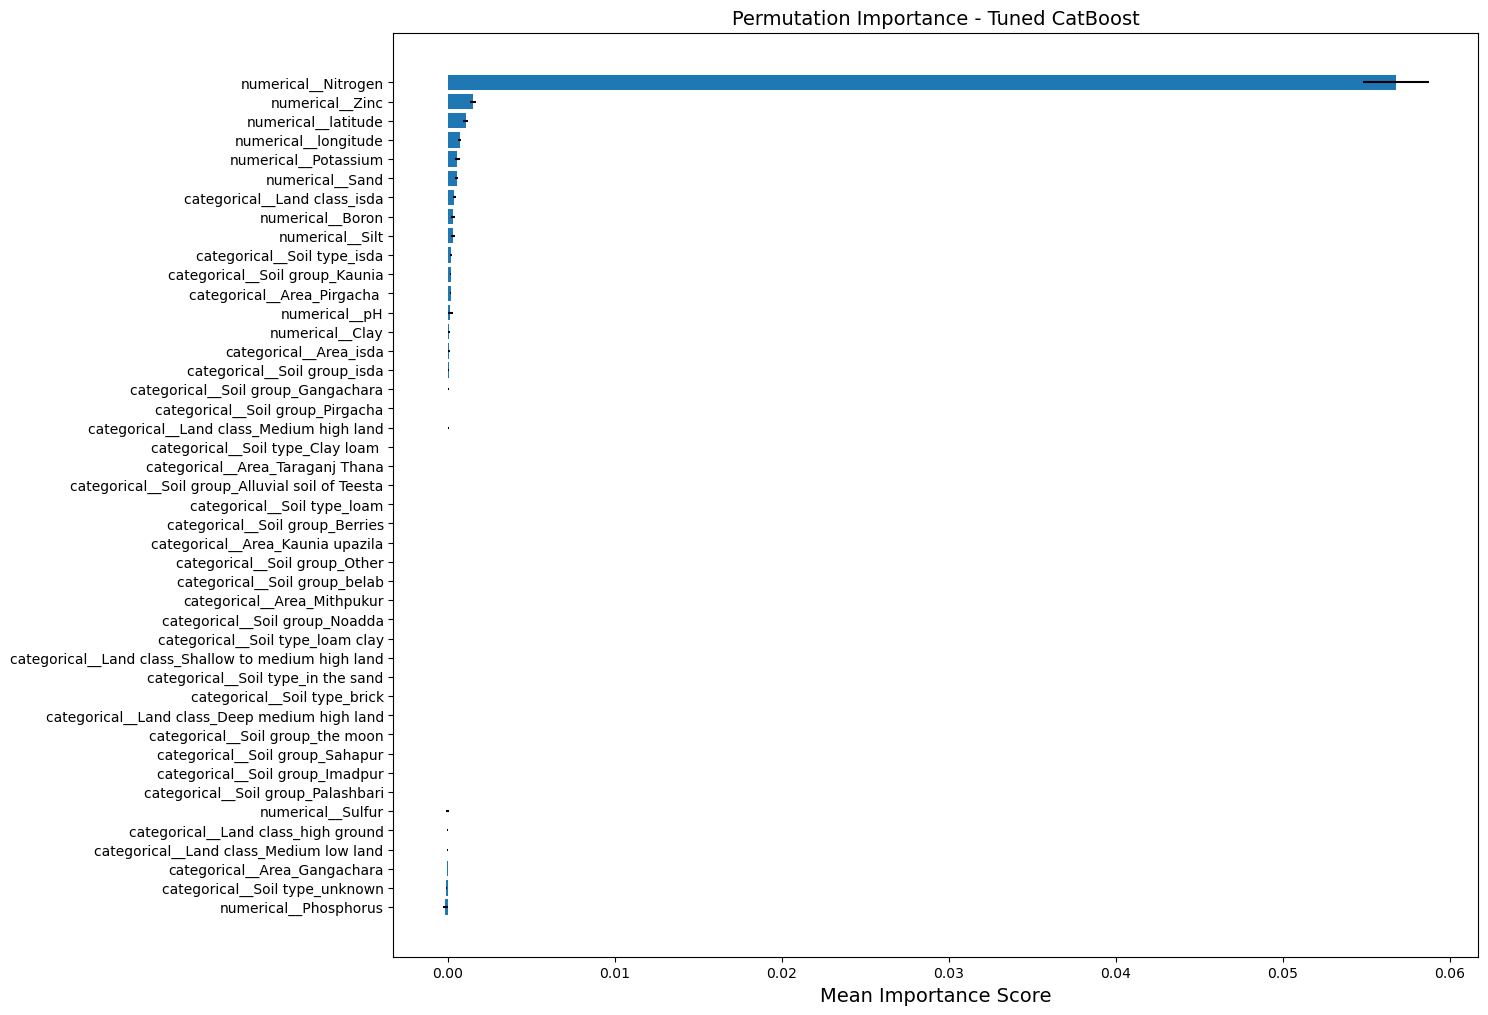

In [59]:
# Visualize the feature importance using a bar plot

plt.figure(figsize=(14, 12))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'], xerr=perm_importance_df['Std'])
plt.gca().invert_yaxis()  # Reverse the y-axis to display top features first
plt.xlabel('Mean Importance Score', fontsize=14)
plt.title('Permutation Importance - Tuned CatBoost', fontsize=14)
plt.show()

* **Nitrogen** is the most critical predictor across all methods.
* **Zinc, Potassium, Boron, Sulfur, and location features (longitude, latitude)** follow with moderate importance.
* **Soil** and **land-related** features have a small to negligible contribution but show some variability between methods.

# Modeling - Target: "SOC" - Selected Features

In [60]:
df.columns

Index(['longitude', 'latitude', 'Area', 'Soil group', 'Land class',
       'Soil type', 'pH', 'SOC', 'Nitrogen', 'Potassium', 'Phosphorus',
       'Sulfur', 'Boron', 'Zinc', 'Sand', 'Silt', 'Clay'],
      dtype='object')

In [61]:
# Selected Features (not including : 'Clay' , "Area", "Soil group"):

num_var = ['longitude', 'latitude', 'pH', 'Nitrogen', 'Potassium', 
           'Sulfur', 'Boron', 'Zinc', 'Sand', 'Silt', 'Phosphorus']
cat_var = ['Soil type', "Land class"]

# Target variable
y = df['SOC']

X = df[cat_var + num_var]
y = pd.DataFrame(y, columns=['SOC'])

In [62]:
# Train-test split:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 , shuffle=True)

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (1808, 13)
X_test.shape: (776, 13)
y_train.shape: (1808, 1)
y_test.shape: (776, 1)


In [63]:
# Preprocessing with pipelines

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


pipeline_categorical = Pipeline([('onehot', OneHotEncoder(handle_unknown="ignore")),])

pipeline_numerical = Pipeline([('scaler', MinMaxScaler(feature_range=(0,1))),])

pipeline_full = ColumnTransformer([("categorical", pipeline_categorical, cat_var),
                                   ("numerical", pipeline_numerical, num_var)])

In [64]:
# Apply the pipeline

pipeline_full.fit(X_train)

X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)

print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")
print()
print('X_train_transformed:', type(X_train_transformed))
print('X_test_transformed:', type(X_test_transformed))

X_train_transformed.shape: (1808, 24)
X_test_transformed.shape: (776, 24)

X_train_transformed: <class 'numpy.ndarray'>
X_test_transformed: <class 'numpy.ndarray'>


In [65]:
# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'LassoRegressor': Lasso(max_iter=10000, random_state=42),
    'RidgeRegressor': Ridge(max_iter=10000, random_state=42),
    "ElasticNet": ElasticNet(alpha=0.02, random_state=42),
    'DTR': DecisionTreeRegressor(random_state=42),
    'SVR': SVR(),
    'RFR': RandomForestRegressor(random_state=42),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=5, random_state=42),
    'ADABoost': AdaBoostRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),  
    'LightGBM': lgb.LGBMRegressor(random_state=42)
}

In [66]:
# Train multiple models

model_list=[]
r2_list=[]
mae_list=[]
mse_list=[]
rmse_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_transformed,y_train)

    #Make Predictions
    y_pred=model.predict(X_test_transformed)

    # Evaluation Metric:
    #r2 = model.score(X_test_transformed, y_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(mean_squared_error(y_test, y_pred))

    model_list.append(list(models.keys())[i])
    r2_list.append(r2)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)

    # Print the performance metrics for each model
    print(f"Model: {list(models.keys())[i]}")
    print(f"R2 Score: {r2}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print("="*30)

Model: LinearRegression
R2 Score: 0.819500989750737
MAE: 0.08112181383401837
MSE: 0.012112219341117527
RMSE: 0.11005552844413373
Model: LassoRegressor
R2 Score: -4.959841285900879e-06
MAE: 0.21502230879834203
MSE: 0.06710440904399664
RMSE: 0.2590451872627566
Model: RidgeRegressor
R2 Score: 0.8297016627155523
MAE: 0.08069570276270085
MSE: 0.011427712605007299
RMSE: 0.1069004799100888
Model: ElasticNet
R2 Score: 0.7121656361334532
MAE: 0.11178939062688685
MSE: 0.01931485909118377
RMSE: 0.13897790864444526
Model: DTR
R2 Score: 0.7307313530499069
MAE: 0.09828211717031922
MSE: 0.01806902380817229
RMSE: 0.13442106906349277
Model: SVR
R2 Score: 0.8402576544936531
MAE: 0.078538882641102
MSE: 0.010719362528168514
RMSE: 0.10353435433791294
Model: RFR
R2 Score: 0.8544121265328795
MAE: 0.07281097237926125
MSE: 0.009769539757616652
RMSE: 0.0988409821765074
Model: ExtraTrees
R2 Score: 0.8298685153749155
MAE: 0.07937362767757133
MSE: 0.011416516111436148
RMSE: 0.10684809830519282
Model: ADABoost
R2 S

In [67]:
# Find the index of the model with the best r2 score
best_index_r2 = r2_list.index(max(r2_list))

# Find the index of the model with the best mae score
best_index_mae = mae_list.index(min(mae_list))

# Find the index of the model with the best mse score
best_index_mse = mse_list.index(min(mse_list))

# Find the index of the model with the best rmse score
best_index_rmse = rmse_list.index(min(rmse_list))

# Determine the model with the best performance based on the chosen metric
best_r2_model = model_list[best_index_r2]
best_mae_model = model_list[best_index_mae]
best_mse_model = model_list[best_index_mse]
best_rmse_model = model_list[best_index_rmse]

# Print the best models and their corresponding metric
print("The model with the best R2 score is:", best_r2_model)
print("R2 score:", r2_list[best_index_r2])
print("="*40)
print("The model with the best MAE score is:", best_mae_model)
print("MAE:", mae_list[best_index_mae])
print("="*40)
print("The model with the best MSE score is:", best_mse_model)
print("MSE:", mse_list[best_index_mse])
print("="*40)
print("The model with the best RMSE score is:", best_rmse_model)
print("RMSE:", rmse_list[best_index_rmse])

The model with the best R2 score is: CatBoost
R2 score: 0.8623709292598886
The model with the best MAE score is: CatBoost
MAE: 0.07060712881207667
The model with the best MSE score is: CatBoost
MSE: 0.009235471652815989
The model with the best RMSE score is: CatBoost
RMSE: 0.09610136134736068


In [68]:
# Create a DF for Result:

results_df = pd.DataFrame({
    'Model': model_list,
    'R2 Score': r2_list,
    'MAE': mae_list,
    'MSE': mse_list,
    'RMSE': rmse_list})

results_df.sort_values(by="RMSE", ascending=True)

,Model,R2 Score,MAE,MSE,RMSE
10,CatBoost,0.862371,0.070607,0.009235,0.096101
11,LightGBM,0.860172,0.071077,0.009383,0.096866
6,RFR,0.854412,0.072811,0.009770,0.098841
9,XGBoost,0.842649,0.075631,0.010559,0.102757
5,SVR,0.840258,0.078539,0.010719,0.103534
7,ExtraTrees,0.829869,0.079374,0.011417,0.106848
2,RidgeRegressor,0.829702,0.080696,0.011428,0.106900
0,LinearRegression,0.819501,0.081122,0.012112,0.110056
8,ADABoost,0.814959,0.088360,0.012417,0.111432
4,DTR,0.730731,0.098282,0.018069,0.134421


In [69]:
CatBoost = CatBoostRegressor(random_state=42, verbose=0)
CatBoost.fit(X_train_transformed, y_train)

In [70]:
y_pred =CatBoost.predict(X_test_transformed)

In [71]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2 Score: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R2 Score: 0.8623709292598886
MAE: 0.07060712881207667
MSE: 0.009235471652815989
RMSE: 0.09610136134736068


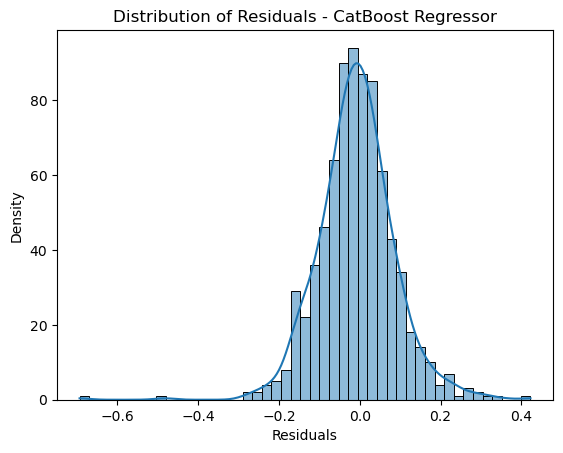

In [72]:
# Calculate residuals
residuals = y_test.values.flatten() - y_pred.flatten()

# Visualize residuals
#sns.kdeplot(residuals)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals - CatBoost Regressor')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

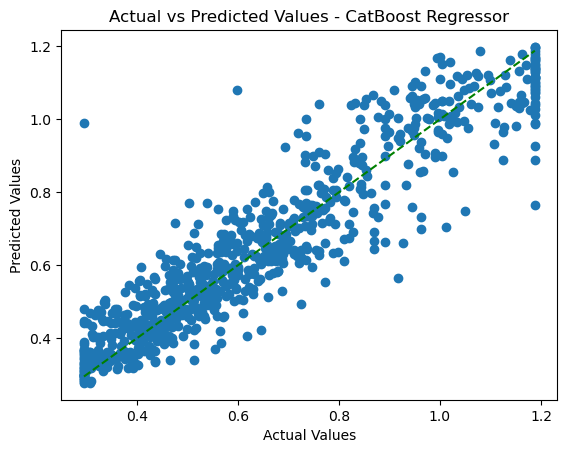

In [73]:
# Line Plot: Actual vs Predicted Values

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='green', label='Actual')
plt.scatter(y_test, y_pred, label='Catboost Regressor Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - CatBoost Regressor')
plt.show()

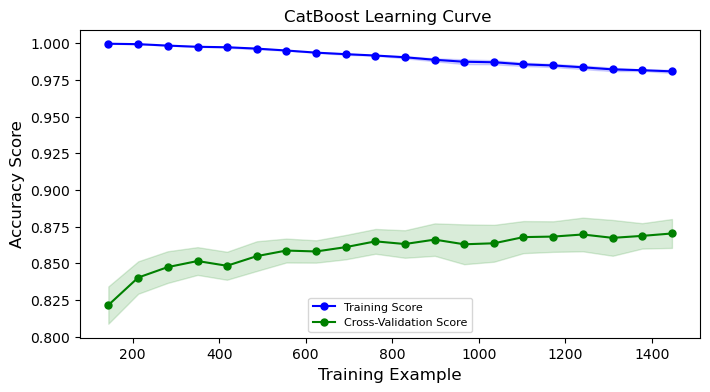

In [74]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=CatBoost, 
                                                       X=X_train_transformed, y=y_train,
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 20), n_jobs=-1)

plt.figure(figsize=(8,4))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('CatBoost Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='lower center', fontsize=8)
plt.show()